## Transcription factor binding

 * a single TF binds to a binding site according to simple mass-action kinetic:
   $$
   P(\mathrm{TF\;bound}) = \frac{[X]}{K + [X]}
   $$
   where $[X]$ is the concentration and $K$ the affinity. 
 * binding is mediated by non-covalent interactions, so $K$ will depend on salt concentrations
 * non-cooperative binding: $P(\mathrm{TF\;bound})$ increases linearly with $[X]$ and saturates at $1$ for $[X]\gg K$

(0.0, 1.0)

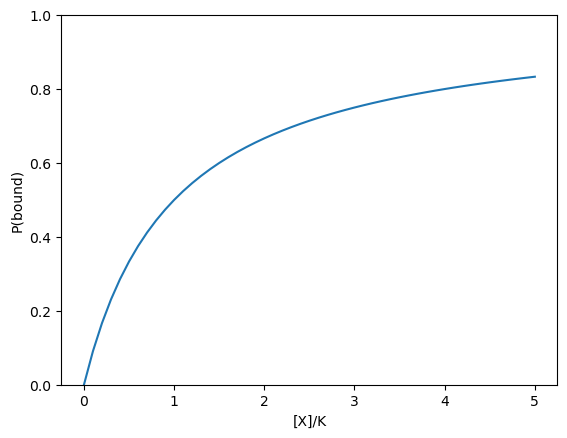

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,51)
plt.plot(x, x/(1+x))
plt.ylabel('P(bound)')
plt.xlabel('[X]/K')
plt.ylim([0,1])

## Cooperative binding

 * precise regulation requires sharper threshold than the simple first order binding above
 * often binding is cooperative and involves multiple TFs (e.g. homo- or hetero-dimers)
 * similar to co-operative binding to of oxygen to hemoglobin

Consider transcription factors A and B

 * TF-DNA interaction A: $\epsilon_A$
 * TF-DNA interaction B: $\epsilon_B$
 * TF-TF interaction: $J_{AB}$

The grand partition function is then (comp. Hiller's script)
\begin{equation}
	\mathcal{Z} = 1 + ([A]/k_A) e^{-\epsilon_A/kT} + ([B]/k_B) e^{-\epsilon_B/kT} + ([A][B]/k_Ak_B)e^{-(\epsilon_A+\epsilon_B+J_{AB})/kT}
\end{equation}

Multiplying by $k_A k_B$, we find for the probability that both A and B are bound:
\begin{equation}
	P_{AB} = \frac{[A][B]e^{-(\epsilon_A+\epsilon_B + J_{AB})}}{k_Ak_B +\cdots+ [A][B]e^{-(\epsilon_A+\epsilon_B+ J_{AB})}}
\end{equation}

If cooperation is strong, this simplifies to:
\begin{equation}
	P_{AB} \approx \frac{[A][B]e^{-(\epsilon_A+\epsilon_B + J_{AB})}}{k_Ak_B + [A][B]e^{-(\epsilon_A+\epsilon_B+ J_{AB})}} = \frac{[A][B]}{K + [A][B]}
\end{equation}

This form of cooperative binding generalizes to $m$ copies of A and $m$ copies of $B$ as follows.
\begin{equation}
	P_{AB} \approx \frac{[A]^m[B]^n}{K + [A]^m[B]^n}
\end{equation}

## Hill-functions and cooperativity

Cooperative binding by a single species is often parameterized by so the so called Hill coefficient $n$. 
The probability of activation if the activator is at concentration $x$ is then

$$
h(x) = \frac{x^n}{K+x^n}
$$

The higher the Hill-coefficient $n$, the more step-like the function is. $K^{1/n}$ marks the value at which $h(x)=0.5$

Text(0.5, 0, 'concentration $x$')

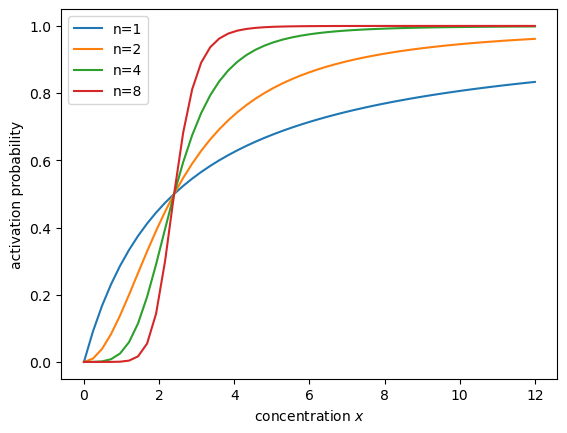

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 2.4
x = np.linspace(0,5*k,51)

for n in [1,2,4,8]:
    K = k**n
    plt.plot(x, x**n/(K+x**n), label=f"n={n}")

plt.legend()
plt.ylabel("activation probability")
plt.xlabel("concentration $x$")

### Repression

The above discussion considered binding of activators. If instead the role of the transcription factor is repression, the expression of the gene is given by 1 minus the binding probability. 

$$
g(x) = 1 - \frac{x^n}{K + x^n} = \frac{K}{K+x^n}
$$



## Time dependent inputs and conditions

Text(0, 0.5, 'hill function')

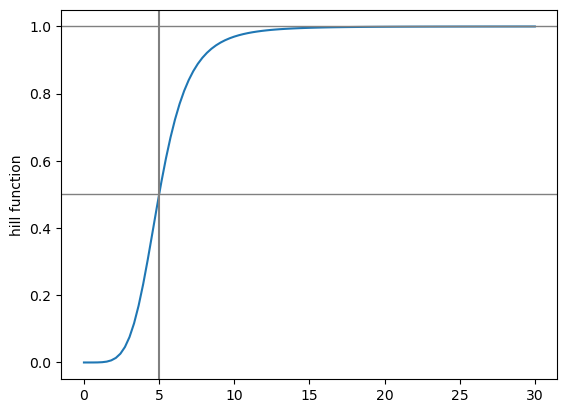

In [20]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# define a hill function with cooperativity n
def hillfunc(x, k, n):
    return x**n/(k**n+x**n)

# define RHS of ODE governing production, note the explicit time dependence!
def dydt(y, t, k, n, alpha, beta):
    # case 1: x high first, low later
    # if t<10:
    #     x=8
    # elif t<15:
    #     x=2
    # else:
    #     x=20
    # case 2: sinusoidal fluctuation 
    x = 5*(1+np.sin(t*2*np.pi/40))
        
    return alpha*hillfunc(x, k, n) - beta*y

# plot the hill function and indicate its 1/2 value and max value
xvals = np.linspace(0,30,100)
plt.plot(xvals, hillfunc(xvals, 5,5))
plt.axvline(5, c='grey')
plt.axhline(.5, c='grey', lw=1)
plt.axhline(1, c='grey', lw=1)
plt.ylabel('hill function')

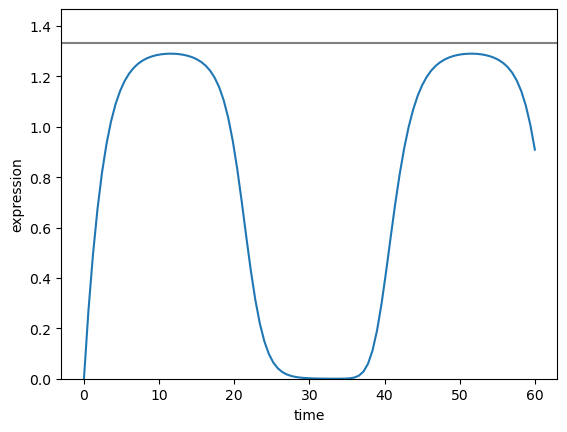

In [22]:
# Solve the solution to the ODE and graph the result
y0 = 0
alpha=1
beta=0.75

n=5
k=5

# array of time points to solve the ODE on
T = np.linspace(0,60,101)

sol = odeint(dydt, y0, T, (k, n, alpha, beta))
plt.plot(T, sol[:,0])
plt.axhline(alpha/beta, c='grey') # equilibrium at full expression
plt.xlabel('time')
plt.ylabel('expression')
plt.ylim(0,alpha/beta*1.1);